<h1>Project COMP3359 Data Visualization and Processing</h1>

pip install the necessary package

In [1]:
# !pip install tensorflow==1.5.0
# !pip install cython

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from keras_preprocessing.image import ImageDataGenerator

# Show all column in data visualization one hot encoded
pd.set_option('max_columns', None)

In [3]:
import random
RAND_SEED = 3359
random.seed(RAND_SEED)

tf.random.set_seed(RAND_SEED)

In [4]:
print(os.listdir("./dataset_1"))
print(os.listdir("./dataset_1/asl_alphabet_train"))
# print(os.listdir("./dataset_1/asl_alphabet_train/A"))

['.DS_Store', 'asl_alphabet_test', 'asl_alphabet_train']
['.DS_Store', 'R', 'U', 'I', 'N', 'G', 'Z', 'T', 'S', 'A', 'F', 'O', 'H', 'del', 'nothing', 'space', 'M', 'J', 'C', 'D', 'V', 'Q', 'X', 'E', 'B', 'K', 'L', 'Y', 'P', 'W']


Right now, the dataset found online contains 87,000 images for the training set (3,000 for each sign, A-Z, space, del and nothing). While the test set only contains 29 images, one for each sign aforementioned. Therefore, we will only use the training set and divide the 87,000 images to training, dev, and test set for our model. The 29 images from the online dataset will be used manually to check the performance of our model at the end. From the 87,000 images, we will use 80% as training dataset (69,600), 10% as dev dataset (8,700), and 10% as test dataset (8,700).

In [5]:
# Function to combine images, its labels and paths
def segment_data(data_folder, destination_label, destination_filename, destination_path):
    for file_name in os.listdir(data_folder):
        destination_filename.append(file_name)
        if file_name.startswith("A"):
            destination_label.append("A")
        elif file_name.startswith("B"):
            destination_label.append("B")
        elif file_name.startswith("C"):
            destination_label.append("C")
        elif file_name.startswith("D"):
            destination_label.append("D")
        elif file_name.startswith("E"):
            destination_label.append("E")
        elif file_name.startswith("F"):
            destination_label.append("F")
        elif file_name.startswith("G"):
            destination_label.append("G")
        elif file_name.startswith("H"):
            destination_label.append("H")
        elif file_name.startswith("I"):
            destination_label.append("I")
        elif file_name.startswith("J"):
            destination_label.append("J")
        elif file_name.startswith("K"):
            destination_label.append("K")
        elif file_name.startswith("L"):
            destination_label.append("L")
        elif file_name.startswith("M"):
            destination_label.append("M")
        elif file_name.startswith("N"):
            destination_label.append("N")
        elif file_name.startswith("O"):
            destination_label.append("O")
        elif file_name.startswith("P"):
            destination_label.append("P")
        elif file_name.startswith("Q"):
            destination_label.append("Q")
        elif file_name.startswith("R"):
            destination_label.append("R")
        elif file_name.startswith("S"):
            destination_label.append("S")
        elif file_name.startswith("T"):
            destination_label.append("T")
        elif file_name.startswith("U"):
            destination_label.append("U")
        elif file_name.startswith("V"):
            destination_label.append("V")
        elif file_name.startswith("W"):
            destination_label.append("W")
        elif file_name.startswith("X"):
            destination_label.append("X")
        elif file_name.startswith("Y"):
            destination_label.append("Y")
        elif file_name.startswith("Z"):
            destination_label.append("Z")
        elif file_name.startswith("del"):
            destination_label.append("del")
        elif file_name.startswith("nothing"):
            destination_label.append("nothing")
        elif file_name.startswith("space"):
            destination_label.append("space")
        destination_path.append(os.path.join(data_folder, file_name))

In [6]:
train_dir = "./dataset_1/asl_alphabet_train"

# We will not use this folder as mentioned earlier
test_dir = "./dataset_1/asl_alphabet_test"

# test_label = []
# test_filename = []
# test_path = []
# test_paths = [ os.path.join(test_dir, file_name) for file_name in os.listdir(test_dir) ]
# segment_data(test_dir, test_label, test_filename, test_path)
# print(test_label)
# print(test_filename)
# print(test_paths)

sign_label = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 
              'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 
              'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'space', 'nothing', 'del']

print("(sign label, sign meaning): ")
print(list(zip(range(len(sign_label)), sign_label)))

# test_df = pd.DataFrame(list(zip(test_filename, test_label)),
#                   columns=['Filenames', 'Sign'])

# # print(train_df)

# test_df_hot_encoded = pd.get_dummies(test_df.Sign)
# test_df_hot_encoded.insert(0, "Filenames", test_df["Filenames"])
# test_df_hot_encoded.head(30)

(sign label, sign meaning): 
[(0, 'A'), (1, 'B'), (2, 'C'), (3, 'D'), (4, 'E'), (5, 'F'), (6, 'G'), (7, 'H'), (8, 'I'), (9, 'J'), (10, 'K'), (11, 'L'), (12, 'M'), (13, 'N'), (14, 'O'), (15, 'P'), (16, 'Q'), (17, 'R'), (18, 'S'), (19, 'T'), (20, 'U'), (21, 'V'), (22, 'W'), (23, 'X'), (24, 'Y'), (25, 'Z'), (26, 'space'), (27, 'nothing'), (28, 'del')]


In [7]:
images_label = []
images_filename = []
images_path = []

for x in sign_label:
    images_folder = train_dir + "/" + x
    segment_data(images_folder, images_label, images_filename, images_path)

images_df = pd.DataFrame(list(zip(images_filename, images_label)),
                  columns=['Filenames', 'Sign'])

images_df_hot_encoded = pd.get_dummies(images_df.Sign)
images_df_hot_encoded.insert(0, "Filenames", images_df["Filenames"])
# train_df_hot_encoded.head()

# Shuffle the data
images_df_shuffled = images_df_hot_encoded.sample(frac=1).reset_index(drop=True)
print("===== Shuffled Images Df =====")
images_df_shuffled
# RANDOM NOT USING SEED MAYBE USE RANDOM.SHUFFLE

===== Shuffled Images Df =====


,Filenames,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,del,nothing,space
0,C2949.jpg,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,S2479.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,space1971.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,C1543.jpg,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Q2578.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86995,D455.jpg,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
86996,R682.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
86997,L1054.jpg,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
86998,Q708.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


Now divide the data as mentioned earlier (80%, 10%, 10%)

In [8]:
# Shuffles the image path
random.shuffle(images_path)

# Take the first 6,700 for dev
# Take the last 6,700 for test
train_path = images_path[6700:80300]
dev_path = images_path[80300:]
test_path = images_path[:6700]


print(train_path[73500])
print(dev_path[0])
print("Training set:", len(train_path))
print("Dev set:", len(dev_path))
print("Test set:",len(test_path))

./dataset_1/asl_alphabet_train/C/C2326.jpg
./dataset_1/asl_alphabet_train/J/J2210.jpg
Training set: 73600
Dev set: 6700
Test set: 6700


In this section, we will visualize our data before pre-processing which we will do in the next section to compare the difference and check whether our image has actually been pre-processed or not. 

In [12]:
def plotHistogram(a):
    """
    Plot histogram of RGB Pixel Intensities
    """
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
#     a = a * 255
    plt.imshow(a)
    plt.axis('on')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);
# plotHistogram(X_train[1])

./dataset_1/asl_alphabet_train/X/X745.jpg
(200, 200, 3)
./dataset_1/asl_alphabet_train/V/V1447.jpg
(200, 200, 3)
./dataset_1/asl_alphabet_train/nothing/nothing1807.jpg
(200, 200, 3)
./dataset_1/asl_alphabet_train/X/X645.jpg
(200, 200, 3)
./dataset_1/asl_alphabet_train/D/D2300.jpg
(200, 200, 3)


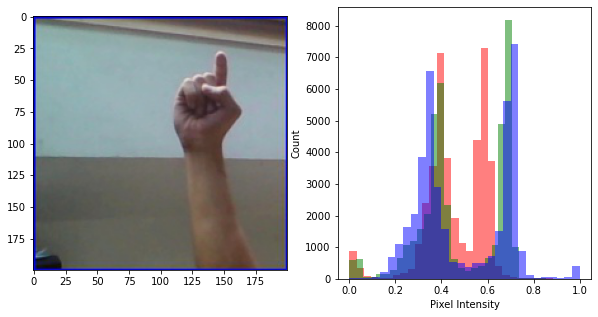

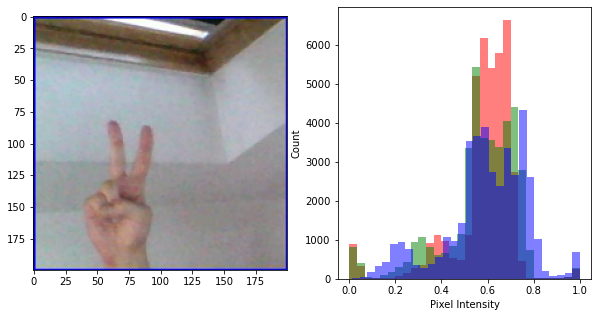

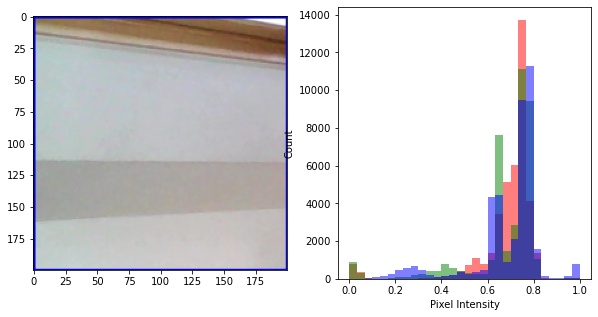

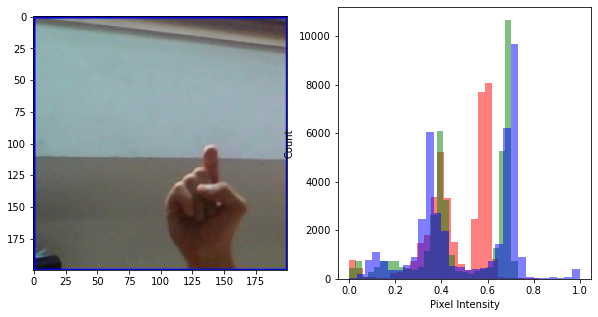

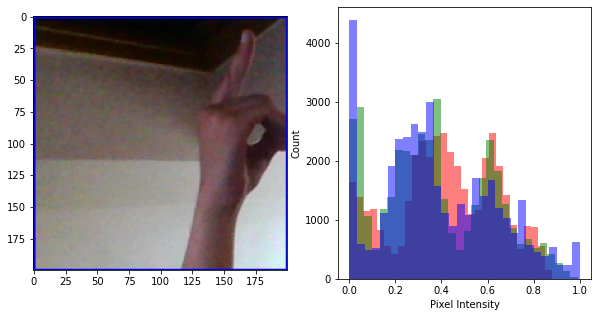

In [13]:
# Converting 5 images to tensors manuallly.

for i in range(5):
    print(train_path[i])
    path = train_path[i]
    image = tf.keras.preprocessing.image.load_img(path)
    image_tensor = tf.keras.preprocessing.image.img_to_array(image)
    # Normalize image
    image_tensor = image_tensor / 255.0
#     image_tensor = tf.image.convert_image_dtype(image_tensor, dtype=tf.int16, saturate=False)
#     print(image_tensor)
    print(image_tensor.shape)
    plotHistogram(image_tensor)

Now, we use Keras "ImageDataGenerator" (data pipeline) to easily convert images into a suitable format to be fitted into our model. This is where we pre-process and augment our data. The Keras "ImageDataGenerator" has many readily available functions to convert images into tensor and data augmentation such as shifting, rotation, brightness altering, etc.

In [30]:
datagen = ImageDataGenerator(rescale = 1/255)

train_generator = datagen.flow_from_dataframe(
        dataframe = images_df_hot_encoded[:29],
        directory = train_dir,
        x_col = "Filenames",
        y_col = sign_label,
        batch_size = 32,
        seed = RAND_SEED,
        shuffle = True,
        class_mode = "raw",
        target_size = (100,100)
    )  

# Trying to combine but fail
# for x in sign_label:
#     if x != 'A':
#         temp_generator = datagen.flow_from_dataframe(
#             dataframe = images_df_hot_encoded[:29],
#             directory = train_dir + "/" + x,
#             x_col = "Filenames",
#             y_col = sign_label,
#             batch_size = 32,
#             seed = RAND_SEED,
#             shuffle = True,
#             class_mode = "raw",
#             target_size = (100,100)
#         )  
#         print(train_generator)
    
#     while True:
        


Found 29 validated image filenames.


In [17]:
# Data visualization before processing
# def plotHistogram(a):
#     """
#     Plot histogram of RGB Pixel Intensities
#     """
#     plt.figure(figsize=(10,5))
#     plt.subplot(1,2,1)
#     plt.imshow(a)
#     plt.axis('off')
#     histo = plt.subplot(1,2,2)
#     histo.set_ylabel('Count')
#     histo.set_xlabel('Pixel Intensity')
#     n_bins = 30
#     plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
#     plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
#     plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);
    
# plotHistogram(train_generator[1])

for _ in range(5):
    img, label = train_generator.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    print(label[0])
    plt.show()

(0, 100, 100, 3)


IndexError: index 0 is out of bounds for axis 0 with size 0